In [33]:
from sktime.registry import all_estimators

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# for forecaster in all_estimators(filter_tags={"scitype:y": ["multivariate", "both"]}):
#     print(forecaster[0])

In [57]:
mdl = all_estimators( as_dataframe=True)

In [ ]:
for mdlname in mdl.name:
    if "ARIMA" in mdlname:
        print(f"Forecast model: {mdlname}")

In [54]:
query_model = "VAR"
user_model_results = [mdlname for mdlname in mdl.name if query_model in mdlname]

In [ ]:
user_model_results

In [ ]:
mdl.name

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
os.getcwd()
os.chdir("D:/my_py_packages/supplyseer")

In [2]:
os.getcwd()

'D:\\my_py_packages\\supplyseer'

In [3]:
from src.supplyseer.models.statistical.arima import ARIMAModel

In [4]:
configs = {"arima_order": [1,0,1],
                 "sarima_order": [0,0,0, 0],
                 "approach": "standard",
                 "random_state": 0,
                 "n_jobs": -1,
                 "optimizer":  "lbfgs",
                 "suppress_warnings":  True,
                 "stationary_target": False,
                 "number_iter":  100,
                 "bayesian": False,
                 "auto_arima": True,
                 "auto_arima_control": "auto",
                 "stationary_target": True}

In [5]:
model = ARIMAModel()

In [57]:
model.get_params()

{'arima_order': [1, 0, 1],
 'sarima_order': [0, 0, 0],
 'approach': 'standard',
 'random_state': 0,
 'number_models_parallel': -1,
 'optimizer': 'lbfgs',
 'suppress_warnings': False,
 'stationary_target': False,
 'number_iter': 100,
 'bayesian': False,
 'auto_arima': False,
 'auto_arima_control': 'auto',
 'seasonal_differencing': 1}

In [5]:
model = ARIMAModel(configs)
model.get_params()

{'arima_order': [1, 0, 1],
 'sarima_order': [0, 0, 0, 0],
 'approach': 'standard',
 'random_state': 0,
 'number_models_parallel': -1,
 'optimizer': 'lbfgs',
 'suppress_warnings': True,
 'stationary_target': True,
 'number_iter': 100,
 'bayesian': False,
 'auto_arima': True,
 'auto_arima_control': 'auto',
 'seasonal_differencing': 1}

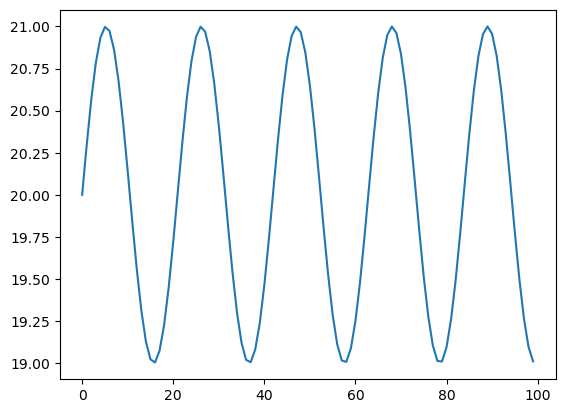

In [6]:
first_range = np.arange(0, 100)
first_term = np.sin(first_range*.3)+20
second_term = np.cos(first_range)
mixed_term = first_term + second_term #+ np.random.normal(size=100)

# plt.plot(first_term)
# plt.plot(second_term)

plt.plot(first_term)

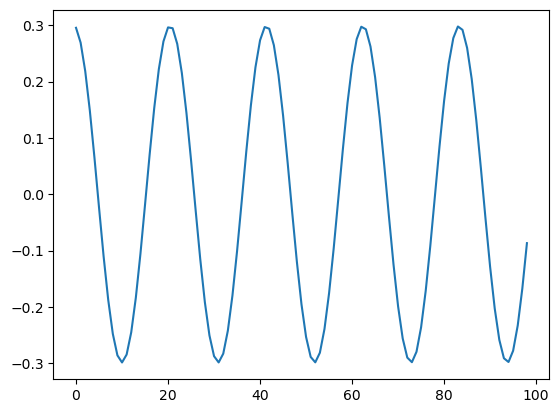

In [8]:
ts = [1, 2, 5, 4, 7, 3, 3, 1, 4, 8, 9, 10, 6, 7, 4, 8, 8, 12]
ts2 = [first_term[i] - first_term[i-1] for i in range(1, len(first_term))]
plt.plot(ts2)

In [7]:
model.estimate_fit(first_term)

Starting model fitting...


c:\Users\jako\anaconda3\envs\geminicomp\Lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
c:\Users\jako\anaconda3\envs\geminicomp\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\jako\anaconda3\envs\geminicomp\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jako\anaconda3\envs\geminicomp\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible st

Model fitting completed.
Model attributes after fitting: ['D', 'SARIMAX_KWARGS_KEYS', '_X', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__rpow__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_alias_params', '_check_X', '_check_X_y', '_check_fh', '_clone_flags', '_components', '_config', '_config_doc', '_config_dynamic', '_converter_store_y', '_cutoff', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_fh', '_fit', '_forecaster', '_get_class_flag', '_get_class_flags', '_get_columns', '_get_doc_link', '_get_fitted_param_names', '_get_fitted_params', '_get_fitted_params_arima_res', '_get_fitted_params_default', '_get_flag', '_get_flags', '_get_in

In [8]:
model.get_fitted_params()

D:\my_py_packages\supplyseer\src\supplyseer\models\statistical\arima.py:94: Warning: AutoARIMA model was fitted but did not converge or store results. Can't pretty print, please use .model.get_fitted_params()
  return warnings.warn(msg, Warning)


In [34]:
from sktime.forecasting.arima import AutoARIMA

In [63]:
model = AutoARIMA(stationary=True)

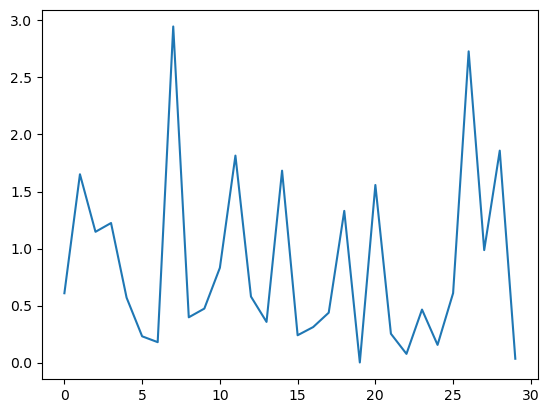

In [47]:
ts = pd.Series(np.random.exponential(1, size=30))
plt.plot(ts)

In [64]:
model.fit(first_term)

c:\Users\jako\anaconda3\envs\geminicomp\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\jako\anaconda3\envs\geminicomp\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jako\anaconda3\envs\geminicomp\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\jako\anaconda3\envs\geminicomp\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autore

AutoARIMA(stationary=True)

In [ ]:
model._

In [53]:
model._get_fitted_params_arima_res()

array([0.85814229, 0.5890411 ])

In [15]:
pd.json_normalize(model.get_fitted_params()).to_dict()

{'sigma2': {0: 7.35287789484695},
 'order': {0: (0, 1, 0)},
 'seasonal_order': {0: (0, 0, 0, 0)},
 'aic': {0: 84.16061681477063},
 'aicc': {0: 84.4272834814373},
 'bic': {0: 84.99383015882685},
 'hqic': {0: 84.2434398643202}}

In [ ]:
phi_L = 1 + np.sum( phi_i * L**i )

In [ ]:
theta_L = 1 - np.sum( theta_i * L**i )

In [ ]:
x_t = c + e_t + sum( phi_i * e_t_i )

In [ ]:
x_t - sum( theta_i * x_t_i )

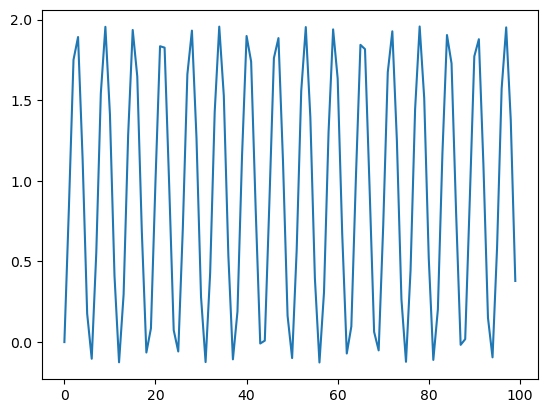

In [10]:
n = 100
c = 1
p = 2  # AR order

# y = np.cumsum(np.random.normal(0, 1, n))
y = np.cumsum(np.sin(np.arange(0, 100)))
plt.plot(y)

In [35]:
# Prepare data for estimation
y_lagged = np.column_stack([y[p-i:-i] for i in range(1, p+1)])
y_est = y[p:]

diffs = (y_lagged[:, 0] - y_est)

In [98]:
#np.linalg.inv( np.dot(y_lagged.T, y_lagged ) ) @ np.dot(y_lagged.T, y_est)


placeholder = np.zeros(shape=(98, 2))

for val in range(0, 2):
    for i in range(len(y_lagged)):

        placeholder[i, val] = (y_lagged[i, val] * y_lagged.T[val, i])


In [99]:
placeholder

array([[7.08073418e-01, 0.00000000e+00],
       [3.06519003e+00, 7.08073418e-01],
       [3.57924179e+00, 3.06519003e+00],
       [1.28842006e+00, 3.57924179e+00],
       [3.10329268e-02, 1.28842006e+00],
       [1.06613572e-02, 3.10329268e-02],
       [3.06619959e-01, 1.06613572e-02],
       [2.38112982e+00, 3.06619959e-01],
       [3.82284412e+00, 2.38112982e+00],
       [1.99145262e+00, 3.82284412e+00],
       [1.69083931e-01, 1.99145262e+00],
       [1.57188288e-02, 1.69083931e-01],
       [8.69024904e-02, 1.57188288e-02],
       [1.65225223e+00, 8.69024904e-02],
       [3.74688602e+00, 1.65225223e+00],
       [2.71519265e+00, 3.74688602e+00],
       [4.71126662e-01, 2.71519265e+00],
       [4.17323442e-03, 4.71126662e-01],
       [7.27210425e-03, 4.17323442e-03],
       [9.96446931e-01, 7.27210425e-03],
       [3.36677552e+00, 9.96446931e-01],
       [3.33437173e+00, 3.36677552e+00],
       [9.60019424e-01, 3.33437173e+00],
       [5.50971396e-03, 9.60019424e-01],
       [3.378434

In [25]:
# Least Squares Estimation
ar_params_ls = np.linalg.inv(np.dot(y_lagged.T, y_lagged)) @ np.dot(y_lagged.T, y_est)
residuals_ls = y_est - y_lagged @ ar_params_ls
sigma_ls = np.sqrt(np.sum(residuals_ls**2) / (n - p - p))

ar_params_ls

array([ 1.39742801, -0.70686078])

# Symbolic Equations for AR(p) Least Squares Estimation

## 1. AR(p) Model:

```
y_t = φ_1 y_{t-1} + φ_2 y_{t-2} + ... + φ_p y_{t-p} + ε_t
```

## 2. Matrix Notation:

```
Y = X Φ + ε
```

Where:
- Y = [y_p, y_{p+1}, ..., y_n]^T  (n-p x 1 vector)
- X = [
    [y_{p-1}, y_{p-2}, ..., y_0]
    [y_p,     y_{p-1}, ..., y_1]
    ...
    [y_{n-1}, y_{n-2}, ..., y_{n-p}]
  ]  (n-p x p matrix)
- Φ = [φ_1, φ_2, ..., φ_p]^T  (p x 1 vector)
- ε = [ε_p, ε_{p+1}, ..., ε_n]^T  (n-p x 1 vector)

## 3. Least Squares Estimator:

```
Φ̂ = (X^T X)^{-1} X^T Y
```

## 4. Residuals:

```
ε̂ = Y - X Φ̂
```

## 5. Estimate of Error Variance:

```
σ̂^2 = (1 / (n-2p)) * Σ_{t=p}^n (y_t - Σ_{i=1}^p φ̂_i y_{t-i})^2
```

## 6. Standard Error of φ̂:

```
SE(φ̂) = sqrt(diag((X^T X)^{-1} σ̂^2))
```

### Explanations:

1. **AR(p) Model**: This is the basic form of the Autoregressive model of order p.

2. **Matrix Notation**: 
   - Y is the vector of observations from time p to n.
   - X is the matrix of lagged values, where each row corresponds to the p lagged values for each observation in Y.
   - Φ is the vector of AR coefficients we're estimating.
   - ε is the vector of error terms.

3. **Least Squares Estimator**: This is the formula for the Ordinary Least Squares estimator, which corresponds to:
   `ar_params_ls = np.linalg.inv(y_lagged.T @ y_lagged) @ y_lagged.T @ y_est`

4. **Residuals**: This corresponds to:
   `residuals_ls = y_est - y_lagged @ ar_params_ls`

5. **Estimate of Error Variance**: This is the formula for σ̂² (sigma squared), which corresponds to:
   `sigma_ls = np.sqrt(np.sum(residuals_ls**2) / (n - p - p))`
   Note that we divide by (n-2p) for the degrees of freedom correction.

6. **Standard Error**: This gives the standard errors of the estimated coefficients, useful for inference.

These symbolic equations provide a mathematical representation of the Least Squares estimation process for an AR(p) model, directly corresponding to the NumPy operations in the code.

In [103]:
# Maximum Likelihood Estimation
def neg_log_likelihood(params, y):
    ar_params, sigma = params[:-1], params[-1]
    n = len(y)
    p = len(ar_params)
    y_lagged = np.column_stack([y[p-i:-i] for i in range(1, p+1)])
    residuals = y[p:] - y_lagged @ ar_params
    return 0.5 * (n-p) * np.log(2 * np.pi * sigma**2) + np.sum(residuals**2) / (2 * sigma**2)

In [104]:
initial_guess = np.concatenate((ar_params_ls, [sigma_ls]))

In [106]:
bounds = [(None, None)] * p + [(1e-6, None)]

In [108]:
from scipy.optimize import minimize

In [111]:
result = minimize(neg_log_likelihood, initial_guess, args=(y, ), bounds=bounds, method="L-BFGS-B")

In [112]:
ar_params_mle, sigma_mle = result.x[:-1], result.x[-1]

In [116]:
print("\nMaximum Likelihood Estimates:")
print(f"AR parameters: {ar_params_mle}")
print(f"sigma: {sigma_mle:.4f}")


Maximum Likelihood Estimates:
AR parameters: [ 1.07384612 -0.08383011]
sigma: 0.8804


In [117]:
# Model comparison using AIC
def aic(log_likelihood, k):
    return 2 * k - 2 * log_likelihood

ls_aic = aic(-neg_log_likelihood(initial_guess, y), p + 1)
mle_aic = aic(-neg_log_likelihood(result.x, y), p + 1)

print("\nModel Comparison:")
print(f"Least Squares AIC: {ls_aic:.4f}")
print(f"MLE AIC: {mle_aic:.4f}")


Model Comparison:
Least Squares AIC: 259.1373
MLE AIC: 259.1166


In [132]:
def predict_ar(y, ar_params, steps=1):
    p = len(ar_params)
    n = len(y)
    
    # Initialize predictions array
    predictions = np.zeros(steps)
    
    for i in range(steps):
        # For each step, calculate the prediction using the AR equation
        if i < p:
            # Use actual values where available
            pred = np.sum(ar_params * y[n-p+i:n][::-1])
        else:
            # Use previous predictions when actual values are not available
            pred = np.sum(ar_params * predictions[i-p:i][::-1])
        
        predictions[i] = pred
    
    return predictions


def ar_fit_values(y, ar_params):
    p = len(ar_params)
    n = len(y)
    
    # Initialize fitted values array
    fitted = np.zeros(n)
    
    # The first p values can't be estimated
    fitted[:p] = np.nan
    
    # Calculate fitted values
    for t in range(p, n):
        fitted[t] = np.sum(ar_params * y[t-p:t][::-1])
    
    return fitted

In [173]:
# Make predictions
forecast_steps = 20
predictions = predict_ar(y[:-forecast_steps], ar_params_ls, steps=forecast_steps)

print(f"Forecasted values for the next {forecast_steps} steps:")
print(predictions)

Forecasted values for the next 20 steps:
[ 7.31053925e-01  1.04497975e+00  9.43530632e-01  5.79860929e-01
  1.43369104e-01 -2.09532948e-01 -3.94149209e-01 -4.02684522e-01
 -2.84114013e-01 -1.12386985e-01  4.37763336e-02  1.40616227e-01
  1.65557281e-01  1.31958286e-01  6.73762564e-02  8.77330458e-04
 -4.63996272e-02 -6.54602894e-02 -5.86779654e-02 -3.57269211e-02]


In [174]:
preds_full = np.concatenate(([np.nan]*len(y[:-forecast_steps]), predictions))

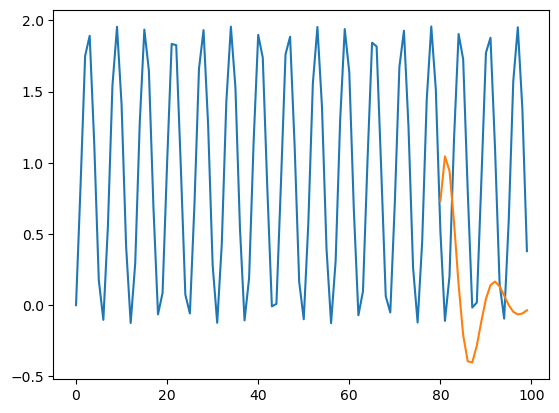

In [175]:
plt.plot(y)
plt.plot(preds_full)